In [24]:
import cv2
cam = cv2.VideoCapture(0)


Id=input('Item ID')
sampleNum=0

x = 80
y =150
w = 240
h = 320

while(True):
    ret, img = cam.read()
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow('frame',img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Balck', gray[y:y+h,x:x+w])
#     cv2.imshow('frame2',gray)
    k = cv2.waitKey(1)
    if k == 97:
        print("clicking")
        cv2.imwrite("Test\Slipper."+Id +'.'+ str(sampleNum) + ".jpg", gray[y:y+h,x:x+w])
        sampleNum=sampleNum+1
        print(sampleNum)
        print("clicked")
        
    k = cv2.waitKey(1)
    if k == 27: 
        break
cam.release()
cv2.destroyAllWindows()

Item ID5
clicking
1
clicked


In [1]:
import cv2
import os
import numpy as np
from PIL import Image
import tensorflow as tf 


x = 80
y =150
w = 240
h = 320


path='Images_all_footwear'
def getImages(path):
    imagePaths=[os.path.join(path,f) for f in os.listdir(path)]
    images =[]
    categories=[]
    different_categories = {'Shoes':0, 'Sandals':1, 'Slipper':2 ,'extra':3}

    for imagepath in imagePaths:
        item_img=Image.open(imagepath)
#         
        images_array=np.array(item_img,'uint8')
#         print(imagepath)
        category= os.path.split(imagepath)[-1].split(".")[0]
    
        
        images.append(images_array)        
        categories.append(category)
        cv2.imshow("training",images_array)
        cv2.waitKey(10)
        
    categories = [different_categories[category] for category in categories]
    return np.array(categories),images



categories,images=getImages(path)

import random
np.random.seed(101)
np.random.shuffle(images) 
np.random.seed(101)
np.random.shuffle(categories)
 

print(categories.shape)
print(images[0].shape)


# from joblib import dump, load
# dump(model, 'model.joblib')

cv2.destroyAllWindows()



(274,)
(320, 240)


In [2]:
categories

array([3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 3, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 3, 2, 2, 2, 0, 2, 0, 0, 3, 0, 2,
       3, 1, 2, 2, 1, 2, 2, 3, 0, 0, 3, 3, 0, 1, 1, 2, 0, 2, 0, 2, 1, 3,
       3, 3, 1, 2, 2, 1, 2, 0, 0, 3, 0, 2, 2, 1, 2, 0, 1, 3, 0, 3, 3, 0,
       2, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2,
       2, 2, 0, 0, 1, 3, 0, 0, 2, 2, 2, 0, 1, 3, 1, 0, 0, 1, 1, 3, 1, 0,
       0, 3, 2, 1, 2, 1, 0, 0, 0, 2, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1,
       0, 2, 2, 3, 2, 1, 1, 0, 3, 3, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 2, 2,
       2, 3, 0, 3, 0, 1, 1, 3, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 3, 0, 1, 2, 0, 3, 2, 0, 3, 3, 0, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0,
       0, 0, 3, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 2, 3, 2, 3, 1, 2, 0, 1,
       3, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 0, 0, 1, 2, 3, 0,
       0, 2, 2, 2, 0, 3, 1, 1, 1, 3])

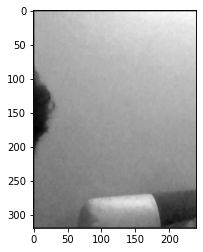

In [3]:
# cv2.imshow()
from matplotlib import pyplot as plt
plt.imshow(images[-1],cmap="gray")
plt.show()

In [4]:
images[7]

array([[ 30,  27,  30, ...,  28,  30,  30],
       [ 28,  31,  26, ...,  29,  26,  29],
       [ 29,  29, 207, ..., 252,  76,  31],
       ...,
       [ 32,  30, 192, ...,  45,  53,  30],
       [ 29,  27, 194, ...,  51,  52,  28],
       [ 28,  31,  29, ...,  30,  28,  30]], dtype=uint8)

In [5]:
# model = tf.keras.Sequential([tf.keras.layers.InputLayer((320,240,1)),
#                                    #tf.keras.layers.Conv2D(10,7),
#                                    tf.keras.layers.Dense(64,activation ="relu"),
#                                    tf.keras.layers.Dense(64,activation ="relu"),
#                                    tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(4,activation =tf.nn.softmax)])

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(320,240,1)),
                                    tf.keras.layers.Dense(64,activation ="relu"),
                                    tf.keras.layers.Dense(64,activation ="relu"),
                                    tf.keras.layers.Dense(4,activation =tf.nn.softmax)])

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(320,240)),
#                                     tf.keras.layers.Dense(64,activation ="relu"),
#                                     tf.keras.layers.Dense(64,activation ="relu"),
#                                     tf.keras.layers.Dense(4,activation =tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
categories.shape

(274,)

In [7]:
images[0].shape

(320, 240)

In [8]:
images_1 = np.array(images)
images_1 = images_1/255.0
images_1.shape

(274, 320, 240)

In [9]:
images_1

array([[[0.12156863, 0.09411765, 0.1254902 , ..., 0.10588235,
         0.11764706, 0.11372549],
        [0.11372549, 0.13333333, 0.10196078, ..., 0.11372549,
         0.1254902 , 0.11372549],
        [0.11764706, 0.10196078, 0.64705882, ..., 0.98823529,
         0.98823529, 0.10588235],
        ...,
        [0.11372549, 0.09803922, 0.39215686, ..., 0.40784314,
         0.42745098, 0.10196078],
        [0.11372549, 0.13333333, 0.36078431, ..., 0.41176471,
         0.39215686, 0.11764706],
        [0.11372549, 0.10980392, 0.11764706, ..., 0.11764706,
         0.10980392, 0.11764706]],

       [[0.10196078, 0.12941176, 0.10588235, ..., 0.11372549,
         0.11764706, 0.11372549],
        [0.12941176, 0.09019608, 0.1372549 , ..., 0.10588235,
         0.10980392, 0.11372549],
        [0.10196078, 0.1254902 , 0.42745098, ..., 0.63529412,
         0.64705882, 0.11372549],
        ...,
        [0.09803922, 0.10980392, 0.16862745, ..., 0.11372549,
         0.10196078, 0.10196078],
        [0.1

In [10]:
# from matplotlib import pyplot as plt
# plt.imshow(imag`es_1[7])
# plt.show()

In [11]:
images_1 = images_1.reshape(categories.shape[0], 320, 240,1)


In [12]:
model.fit(images_1,categories,epochs=15,batch_size = 27)

Epoch 1/15
11/11 [==============================] - 1s 33ms/step - loss: 13.8079 - accuracy: 0.3029
Epoch 2/15
11/11 [==============================] - 0s 34ms/step - loss: 13.1484 - accuracy: 0.3066
Epoch 3/15
11/11 [==============================] - 0s 34ms/step - loss: 6.6866 - accuracy: 0.4234
Epoch 4/15
11/11 [==============================] - 0s 36ms/step - loss: 3.4157 - accuracy: 0.3832
Epoch 5/15
11/11 [==============================] - 0s 34ms/step - loss: 1.5743 - accuracy: 0.4891
Epoch 6/15
11/11 [==============================] - 0s 36ms/step - loss: 1.0443 - accuracy: 0.5620
Epoch 7/15
11/11 [==============================] - 0s 38ms/step - loss: 1.5491 - accuracy: 0.5803
Epoch 8/15
11/11 [==============================] - 0s 34ms/step - loss: 0.9570 - accuracy: 0.6423
Epoch 9/15
11/11 [==============================] - 0s 36ms/step - loss: 0.6292 - accuracy: 0.7591
Epoch 10/15
11/11 [==============================] - 0s 38ms/step - loss: 0.9420 - accuracy: 0.7007
Epoch 1

In [13]:
import cv2
from PIL import Image
import numpy as np

# from joblib import dump, load
# model = load('model.joblib') 

x = 80
y = 150
h = 320
w = 240

def detect_img(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    cv2.rectangle(image, (x, y), (x +240, y + 320), (255, 255, 0), 2)
    
    gray = gray[y:y + h, x:x + w]
    gray = gray.reshape(320,240,1)
#     print(gray.shape)
    
    gray_flat = gray.flatten()
#     category = model.predict(gray[np.newaxis, ...])
    category =  np.argmax(model.predict(gray[np.newaxis, ...]))
#     category2 =  model.predict(gray[np.newaxis, ...])
    
    print("Here in the category: -------------------------------- ", category)

#      if (uncertainty< 80):
    if (category == 0):
        name = "Shoes"
        cv2.putText(img, name, (x, y + h), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2.0, (0, 0, 255))
    elif (category==1):
        name = "Sandals"
        cv2.putText(img, name, (x, y + h), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2.0, (0, 0, 255))
    elif (category==2):
        name = "Slippers"
        cv2.putText(img, name, (x, y + h), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2.0, (0, 0, 255))
    else:
        name = "Unknown"
        cv2.putText(img, name, (x, y + h), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2.0, (0, 0, 255))
    
    return image, gray, gray_flat

capt = cv2.VideoCapture(0)
while True:
    ret, img = capt.read()

    result_img, gray, gray_flat = detect_img(img)
    
    cv2.imshow('recognising',result_img)
    cv2.imshow('recognising2',gray)
    #cv2.imshow('recognising3',gray_flat)
    #print(gray_flat)
    key = cv2.waitKey(1)
    if key == 27:
        break

        
capt.release() 
  
cv2.destroyAllWindows()


Here in the category: --------------------------------  3
[58 58 58 ... 45 44 40]
Here in the category: --------------------------------  3
[56 56 57 ... 46 45 44]
Here in the category: --------------------------------  3
[59 59 61 ... 48 47 44]
Here in the category: --------------------------------  3
[63 63 63 ... 51 50 49]
Here in the category: --------------------------------  3
[66 66 68 ... 50 50 49]
Here in the category: --------------------------------  3
[71 72 72 ... 53 53 54]
Here in the category: --------------------------------  3
[70 71 72 ... 55 53 53]
Here in the category: --------------------------------  3
[73 73 75 ... 56 55 55]
Here in the category: --------------------------------  3
[76 77 77 ... 58 54 54]
Here in the category: --------------------------------  3
[74 75 75 ... 58 57 56]
Here in the category: --------------------------------  3
[77 78 78 ... 61 59 58]
Here in the category: --------------------------------  3
[76 76 76 ... 61 58 55]
Here in the cate

[83 83 86 ... 75 73 73]
Here in the category: --------------------------------  3
[80 81 83 ... 69 66 67]
Here in the category: --------------------------------  3
[82 83 84 ... 65 64 60]
Here in the category: --------------------------------  3
[80 80 82 ... 62 61 63]
Here in the category: --------------------------------  3
[82 83 83 ... 73 71 73]
Here in the category: --------------------------------  3
[81 83 84 ... 80 83 84]
Here in the category: --------------------------------  3
[83 84 80 ... 68 67 67]
Here in the category: --------------------------------  3
[84 84 84 ... 68 65 70]
Here in the category: --------------------------------  3
[86 86 86 ... 71 68 72]
Here in the category: --------------------------------  3
[80 80 82 ... 67 66 66]
Here in the category: --------------------------------  3
[85 85 85 ... 64 63 63]
Here in the category: --------------------------------  3
[82 81 81 ... 67 62 62]
Here in the category: --------------------------------  3
[78 81 82 ... 79

Here in the category: --------------------------------  3
[82 82 83 ... 65 65 71]
Here in the category: --------------------------------  3
[79 78 78 ... 65 68 67]
Here in the category: --------------------------------  3
[79 83 83 ... 71 71 75]
Here in the category: --------------------------------  3
[82 84 86 ... 65 66 67]
Here in the category: --------------------------------  3
[79 83 82 ... 65 66 70]
Here in the category: --------------------------------  3
[83 84 84 ... 71 71 74]
Here in the category: --------------------------------  3
[79 79 79 ... 62 63 67]
Here in the category: --------------------------------  3
[84 85 85 ... 62 64 65]
Here in the category: --------------------------------  3
[80 84 84 ... 64 65 70]
Here in the category: --------------------------------  3
[81 83 83 ... 72 73 76]
Here in the category: --------------------------------  3
[83 83 84 ... 64 65 66]
Here in the category: --------------------------------  3
[83 85 85 ... 69 67 68]
Here in the cate

Here in the category: --------------------------------  3
[82 82 81 ... 82 83 81]
Here in the category: --------------------------------  3
[82 83 85 ... 79 84 83]
Here in the category: --------------------------------  3
[82 82 84 ... 78 78 78]
Here in the category: --------------------------------  3
[82 84 84 ... 77 83 78]
Here in the category: --------------------------------  3
[83 84 85 ... 79 81 81]
Here in the category: --------------------------------  3
[82 83 84 ... 80 80 80]
Here in the category: --------------------------------  3
[82 82 85 ... 83 83 84]
Here in the category: --------------------------------  3
[81 81 83 ... 80 83 83]
Here in the category: --------------------------------  3
[82 83 84 ... 78 79 83]
Here in the category: --------------------------------  3
[82 83 83 ... 78 80 80]
Here in the category: --------------------------------  3
[80 79 81 ... 84 84 83]
Here in the category: --------------------------------  3
[81 81 81 ... 78 79 80]
Here in the cate

Here in the category: --------------------------------  3
[54 54 52 ... 88 79 78]
Here in the category: --------------------------------  3
[55 55 55 ... 78 75 74]
Here in the category: --------------------------------  3
[52 52 53 ... 85 80 74]
Here in the category: --------------------------------  3
[50 50 50 ... 84 80 75]
Here in the category: --------------------------------  3
[51 51 51 ... 83 76 72]
Here in the category: --------------------------------  3
[52 52 52 ... 77 72 72]
Here in the category: --------------------------------  3
[50 50 50 ... 83 81 71]
Here in the category: --------------------------------  3
[50 50 49 ... 80 72 72]
Here in the category: --------------------------------  3
[50 49 52 ... 78 73 72]
Here in the category: --------------------------------  3
[47 47 49 ... 78 74 73]
Here in the category: --------------------------------  3
[49 49 49 ... 75 71 71]
Here in the category: --------------------------------  3
[49 49 49 ... 76 74 72]
Here in the cate

[45 45 45 ... 77 70 71]
Here in the category: --------------------------------  3
[49 49 49 ... 83 77 72]
Here in the category: --------------------------------  3
[46 46 46 ... 78 72 70]
Here in the category: --------------------------------  3
[51 51 50 ... 79 74 72]
Here in the category: --------------------------------  3
[46 46 48 ... 77 75 72]
Here in the category: --------------------------------  3
[49 48 46 ... 80 75 76]
Here in the category: --------------------------------  3
[45 44 44 ... 84 73 72]
Here in the category: --------------------------------  1
[45 44 45 ... 76 70 70]
Here in the category: --------------------------------  3
[49 49 47 ... 84 79 71]
Here in the category: --------------------------------  3
[45 45 45 ... 86 79 71]
Here in the category: --------------------------------  3
[50 49 49 ... 79 75 72]
Here in the category: --------------------------------  3
[45 45 45 ... 75 70 71]
Here in the category: --------------------------------  3
[48 49 49 ... 82

Here in the category: --------------------------------  3
[49 49 49 ... 81 72 71]
Here in the category: --------------------------------  3
[48 48 48 ... 75 72 71]
Here in the category: --------------------------------  1
[45 46 51 ... 80 76 71]
Here in the category: --------------------------------  1
[48 47 48 ... 78 78 75]
Here in the category: --------------------------------  1
[46 45 45 ... 72 72 71]
Here in the category: --------------------------------  1
[45 45 44 ... 76 72 72]
Here in the category: --------------------------------  3
[46 47 48 ... 78 78 71]
Here in the category: --------------------------------  1
[44 45 46 ... 72 72 71]
Here in the category: --------------------------------  1
[47 48 48 ... 70 70 69]
Here in the category: --------------------------------  1
[44 44 44 ... 82 73 72]
Here in the category: --------------------------------  1
[46 48 49 ... 82 72 71]
Here in the category: --------------------------------  1
[45 45 45 ... 77 71 71]
Here in the cate

Here in the category: --------------------------------  3
[48 49 47 ... 93 78 78]
Here in the category: --------------------------------  3
[46 45 44 ... 70 82 85]
Here in the category: --------------------------------  3
[49 49 49 ... 86 95 88]
Here in the category: --------------------------------  3
[ 54  53  48 ... 103 103 105]
Here in the category: --------------------------------  3
[ 73  64  52 ... 104 104 104]
Here in the category: --------------------------------  3
[ 73  69  58 ...  96 102 105]
Here in the category: --------------------------------  3
[79 78 77 ... 75 74 75]
Here in the category: --------------------------------  3
[74 74 75 ... 73 74 74]
Here in the category: --------------------------------  3
[75 76 77 ... 79 76 73]
Here in the category: --------------------------------  3
[73 72 72 ... 74 74 71]
Here in the category: --------------------------------  3
[78 78 81 ... 80 74 74]
Here in the category: --------------------------------  3
[75 75 77 ... 80 79 74

[50 52 51 ... 80 75 75]
Here in the category: --------------------------------  2
[51 50 51 ... 82 74 71]
Here in the category: --------------------------------  2
[49 49 49 ... 83 73 73]
Here in the category: --------------------------------  3
[49 49 50 ... 79 73 72]
Here in the category: --------------------------------  3
[46 47 47 ... 75 75 71]
Here in the category: --------------------------------  3
[45 43 45 ... 77 74 72]
Here in the category: --------------------------------  3
[47 49 49 ... 75 70 71]
Here in the category: --------------------------------  3
[43 44 46 ... 72 71 71]
Here in the category: --------------------------------  3
[48 48 48 ... 76 72 66]
Here in the category: --------------------------------  3
[49 49 49 ... 73 72 71]
Here in the category: --------------------------------  3
[49 49 50 ... 73 70 69]
Here in the category: --------------------------------  3
[45 45 45 ... 73 71 70]
Here in the category: --------------------------------  3
[46 48 48 ... 74

Here in the category: --------------------------------  3
[50 49 46 ... 32 31 30]
Here in the category: --------------------------------  3
[48 47 45 ... 32 32 32]
Here in the category: --------------------------------  3
[43 47 48 ... 31 31 31]
Here in the category: --------------------------------  3
[47 48 47 ... 30 31 31]
Here in the category: --------------------------------  3
[44 45 45 ... 31 30 30]
Here in the category: --------------------------------  3
[47 46 46 ... 31 31 31]
Here in the category: --------------------------------  3
[44 41 40 ... 29 30 31]
Here in the category: --------------------------------  3
[46 46 47 ... 32 32 32]
Here in the category: --------------------------------  3
[50 49 49 ... 29 29 28]
Here in the category: --------------------------------  3
[49 49 51 ... 32 31 31]
Here in the category: --------------------------------  3
[50 50 50 ... 29 29 29]
Here in the category: --------------------------------  3
[48 49 49 ... 30 29 31]
Here in the cate

Here in the category: --------------------------------  3
[72 79 80 ... 91 83 75]
Here in the category: --------------------------------  3
[84 84 85 ... 79 71 71]
Here in the category: --------------------------------  3
[77 78 81 ... 79 73 72]
Here in the category: --------------------------------  3
[81 82 82 ... 80 72 70]
Here in the category: --------------------------------  3
[81 81 82 ... 88 80 72]
Here in the category: --------------------------------  3
[81 82 83 ... 82 77 66]
Here in the category: --------------------------------  3
[78 79 79 ... 75 73 71]
Here in the category: --------------------------------  3
[82 82 82 ... 87 78 70]
Here in the category: --------------------------------  3
[81 83 84 ... 80 78 72]
Here in the category: --------------------------------  3
[82 84 84 ... 74 71 66]
Here in the category: --------------------------------  3
[79 79 80 ... 70 70 70]
Here in the category: --------------------------------  3
[83 84 84 ... 77 71 69]
Here in the cate

[ 81  83  83 ... 107 109 106]
Here in the category: --------------------------------  3
[103 105 111 ... 130 131 128]
Here in the category: --------------------------------  3
[92 92 92 ... 79 79 80]
Here in the category: --------------------------------  3
[ 64  64  65 ... 114 111 109]
Here in the category: --------------------------------  3
[ 48  50  50 ... 107 108 101]
Here in the category: --------------------------------  3
[ 49  49  48 ... 116 122 126]
Here in the category: --------------------------------  3
[ 47  47  47 ... 101 102 115]
Here in the category: --------------------------------  3
[ 44  48  48 ... 120 121 121]
Here in the category: --------------------------------  3
[44 44 45 ... 75 77 74]
Here in the category: --------------------------------  3
[ 86  87  87 ... 236 237 237]
Here in the category: --------------------------------  3
[ 89  89  90 ... 239 239 239]
Here in the category: --------------------------------  3
[ 94  95  95 ... 239 237 238]
Here in the ca

[57 59 59 ... 28 28 28]
Here in the category: --------------------------------  3
[55 56 58 ... 28 29 29]
Here in the category: --------------------------------  3
[58 58 58 ... 30 28 30]
Here in the category: --------------------------------  3
[55 55 55 ... 28 28 30]
Here in the category: --------------------------------  3
[58 58 57 ... 32 27 28]
Here in the category: --------------------------------  3
[52 53 54 ... 30 28 28]
Here in the category: --------------------------------  3
[56 56 56 ... 32 32 32]
Here in the category: --------------------------------  3
[57 57 56 ... 33 33 32]
Here in the category: --------------------------------  3
[56 56 56 ... 36 36 36]
Here in the category: --------------------------------  3
[60 60 58 ... 37 38 35]
Here in the category: --------------------------------  3
[56 57 57 ... 38 36 35]
Here in the category: --------------------------------  3
[57 57 58 ... 42 39 39]
Here in the category: --------------------------------  3
[59 60 60 ... 43

Here in the category: --------------------------------  3
[ 43  43  43 ... 119 108 109]
Here in the category: --------------------------------  3
[ 43  43  43 ... 124 113 107]
Here in the category: --------------------------------  3
[ 45  44  44 ... 119 117 110]
Here in the category: --------------------------------  3
[ 43  42  43 ... 117 120 120]
Here in the category: --------------------------------  3
[ 46  46  46 ... 123 120 110]
Here in the category: --------------------------------  3
[ 43  44  44 ... 110 116 115]
Here in the category: --------------------------------  3
[ 45  45  44 ... 106 119 120]
Here in the category: --------------------------------  3
[ 56  58  57 ... 117 123 123]
Here in the category: --------------------------------  3
[ 83  83  84 ... 108 120 126]
Here in the category: --------------------------------  3
[ 95  96  98 ... 121 124 124]
Here in the category: --------------------------------  3
[158 159 160 ... 123 125 113]
Here in the category: ----------

Here in the category: --------------------------------  3
[70 70 69 ... 26 26 25]
Here in the category: --------------------------------  3
[68 68 69 ... 28 27 27]
Here in the category: --------------------------------  3
[69 69 70 ... 27 26 26]
Here in the category: --------------------------------  3
[67 67 69 ... 27 26 26]
Here in the category: --------------------------------  3
[67 67 68 ... 29 28 28]
Here in the category: --------------------------------  3
[68 70 70 ... 27 27 27]
Here in the category: --------------------------------  3
[67 69 70 ... 25 25 25]
Here in the category: --------------------------------  3
[70 70 71 ... 25 23 24]
Here in the category: --------------------------------  3
[66 66 66 ... 25 25 23]
Here in the category: --------------------------------  3
[69 69 69 ... 23 23 22]
Here in the category: --------------------------------  3
[65 66 68 ... 24 24 24]
Here in the category: --------------------------------  3
[70 70 71 ... 25 25 25]
Here in the cate

Here in the category: --------------------------------  3
[81 86 76 ... 23 23 23]
Here in the category: --------------------------------  3
[86 86 84 ... 22 22 21]
Here in the category: --------------------------------  3
[92 91 90 ... 23 23 23]
Here in the category: --------------------------------  3
[85 93 93 ... 23 23 22]
Here in the category: --------------------------------  3
[86 93 97 ... 23 23 23]
Here in the category: --------------------------------  3
[95 94 94 ... 23 25 25]
Here in the category: --------------------------------  3
[89 81 75 ... 25 24 24]
Here in the category: --------------------------------  3
[47 47 49 ... 27 27 27]
Here in the category: --------------------------------  3
[55 55 56 ... 31 28 28]
Here in the category: --------------------------------  3
[84 83 84 ... 38 38 38]
Here in the category: --------------------------------  3
[148 150 150 ...  40  41  42]
Here in the category: --------------------------------  3
[89 89 91 ... 39 42 41]
Here in th

Here in the category: --------------------------------  2
[72 72 73 ... 74 75 78]
Here in the category: --------------------------------  2
[74 70 62 ... 72 78 78]
Here in the category: --------------------------------  2
[73 72 69 ... 81 82 79]
Here in the category: --------------------------------  2
[73 73 71 ... 82 85 81]
Here in the category: --------------------------------  2
[69 60 49 ... 70 72 78]
Here in the category: --------------------------------  2
[67 66 59 ... 75 78 80]
Here in the category: --------------------------------  2
[73 73 73 ... 87 86 82]
Here in the category: --------------------------------  2
[69 69 69 ... 79 79 80]
Here in the category: --------------------------------  2
[51 46 43 ... 79 81 81]
Here in the category: --------------------------------  2
[43 42 42 ... 77 78 77]
Here in the category: --------------------------------  1
[47 47 44 ... 82 83 82]
Here in the category: --------------------------------  2
[44 42 42 ... 74 78 78]
Here in the cate

[91 90 86 ... 35 35 35]
Here in the category: --------------------------------  3
[87 87 86 ... 35 35 36]
Here in the category: --------------------------------  3
[89 89 88 ... 36 37 37]
Here in the category: --------------------------------  3
[89 89 90 ... 36 36 36]
Here in the category: --------------------------------  3
[88 88 87 ... 36 37 37]
Here in the category: --------------------------------  3
[91 91 91 ... 35 36 37]
Here in the category: --------------------------------  3
[88 88 88 ... 37 36 36]
Here in the category: --------------------------------  3
[89 89 90 ... 38 40 41]
Here in the category: --------------------------------  3
[86 87 88 ... 39 39 40]
Here in the category: --------------------------------  3
[86 86 86 ... 36 37 38]
Here in the category: --------------------------------  3
[87 88 88 ... 36 36 36]
Here in the category: --------------------------------  3
[85 85 87 ... 36 37 37]
Here in the category: --------------------------------  3
[87 87 87 ... 41

Here in the category: --------------------------------  3
[75 75 74 ... 43 42 42]
Here in the category: --------------------------------  3
[78 78 79 ... 47 45 46]
Here in the category: --------------------------------  3
[75 77 78 ... 44 44 45]
Here in the category: --------------------------------  3
[79 78 78 ... 49 49 47]
Here in the category: --------------------------------  3
[81 82 83 ... 48 48 47]
Here in the category: --------------------------------  3
[84 86 85 ... 48 48 47]
Here in the category: --------------------------------  3
[82 82 82 ... 44 43 42]
Here in the category: --------------------------------  3
[87 88 88 ... 45 44 43]
Here in the category: --------------------------------  3
[83 83 84 ... 47 45 44]
Here in the category: --------------------------------  3
[86 86 86 ... 47 46 47]
Here in the category: --------------------------------  3
[84 85 85 ... 47 45 45]
Here in the category: --------------------------------  3
[85 86 86 ... 48 44 45]
Here in the cate

Here in the category: --------------------------------  3
[88 88 89 ... 62 55 59]
Here in the category: --------------------------------  3
[87 89 88 ... 65 57 56]
Here in the category: --------------------------------  3
[86 87 91 ... 65 55 54]
Here in the category: --------------------------------  3
[85 86 85 ... 61 58 59]
Here in the category: --------------------------------  3
[88 88 90 ... 62 57 57]
Here in the category: --------------------------------  3
[85 85 86 ... 59 56 56]
Here in the category: --------------------------------  3
[87 87 88 ... 68 59 59]
Here in the category: --------------------------------  3
[87 89 88 ... 59 60 56]
Here in the category: --------------------------------  3
[87 88 88 ... 61 63 60]
Here in the category: --------------------------------  3
[88 89 89 ... 58 58 56]
Here in the category: --------------------------------  3
[82 84 87 ... 59 57 57]
Here in the category: --------------------------------  3
[87 87 88 ... 59 60 61]
Here in the cate

Here in the category: --------------------------------  3
[87 88 91 ... 70 70 68]
Here in the category: --------------------------------  3
[90 90 90 ... 66 63 61]
Here in the category: --------------------------------  3
[87 87 93 ... 72 72 65]
Here in the category: --------------------------------  3
[90 91 90 ... 69 69 66]
Here in the category: --------------------------------  3
[85 86 88 ... 71 67 64]
Here in the category: --------------------------------  3
[90 91 91 ... 66 64 64]
Here in the category: --------------------------------  3
[86 86 87 ... 71 65 64]
Here in the category: --------------------------------  3
[86 85 80 ... 67 66 62]
Here in the category: --------------------------------  3
[90 89 90 ... 64 62 60]
Here in the category: --------------------------------  3
[87 88 88 ... 67 67 62]
Here in the category: --------------------------------  3
[88 89 91 ... 70 66 63]
Here in the category: --------------------------------  3
[88 90 90 ... 71 70 67]
Here in the cate

[89 90 90 ... 62 60 61]
Here in the category: --------------------------------  3
[92 93 94 ... 66 67 63]
Here in the category: --------------------------------  3
[91 91 91 ... 65 63 62]
Here in the category: --------------------------------  3
[91 92 92 ... 67 67 65]
Here in the category: --------------------------------  3
[90 91 91 ... 62 60 59]
Here in the category: --------------------------------  3
[90 90 91 ... 69 66 66]
Here in the category: --------------------------------  3
[93 93 93 ... 66 62 62]
Here in the category: --------------------------------  3
[87 88 89 ... 64 63 60]
Here in the category: --------------------------------  3
[93 93 89 ... 65 62 60]
Here in the category: --------------------------------  3
[91 91 90 ... 62 61 61]
Here in the category: --------------------------------  3
[91 91 90 ... 64 66 66]
Here in the category: --------------------------------  3
[91 92 92 ... 61 60 59]
Here in the category: --------------------------------  3
[88 89 90 ... 62

In [15]:
# def index_of_higprob(l):
#     max_index = l.index(max(l))
#     return max_index

In [16]:
# max_index

In [17]:
zz = model.predict(images_1)

In [18]:
zz

array([[5.7464774e-04, 5.0740568e-05, 2.2520427e-02, 9.7685415e-01],
       [1.0686668e-03, 3.0697067e-03, 8.5671194e-02, 9.1019052e-01],
       [1.9159605e-01, 2.3600449e-05, 3.9409652e-01, 4.1428378e-01],
       ...,
       [4.0227114e-03, 2.6789883e-01, 7.2641206e-01, 1.6664622e-03],
       [2.1750022e-02, 3.1879234e-01, 6.5347093e-01, 5.9867003e-03],
       [1.1448030e-03, 5.1177718e-04, 3.3682067e-02, 9.6466142e-01]],
      dtype=float32)

In [31]:
path='Test'
def getTestImages(path):
    imagePaths=[os.path.join(path,f) for f in os.listdir(path)]
    test_images =[]
    test_categories=[]
    different_categories = {'Shoes':0, 'Sandals':1, 'Slipper':2 ,'extra':3}

    for imagepath in imagePaths:
        item_img=Image.open(imagepath)
        
        images_array=np.array(item_img,'uint8')
        category= os.path.split(imagepath)[-1].split(".")[0]
    
        test_images.append(images_array)        
        test_categories.append(category)
        
    test_categories = [different_categories[category] for category in test_categories]
    return np.array(test_categories),test_images

test_categories, test_images= getTestImages(path)

print(test_categories.shape)
print(test_images[0].shape)

(21,)
(320, 240)


In [19]:
categories

array([3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 3, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 3, 2, 2, 2, 0, 2, 0, 0, 3, 0, 2,
       3, 1, 2, 2, 1, 2, 2, 3, 0, 0, 3, 3, 0, 1, 1, 2, 0, 2, 0, 2, 1, 3,
       3, 3, 1, 2, 2, 1, 2, 0, 0, 3, 0, 2, 2, 1, 2, 0, 1, 3, 0, 3, 3, 0,
       2, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2,
       2, 2, 0, 0, 1, 3, 0, 0, 2, 2, 2, 0, 1, 3, 1, 0, 0, 1, 1, 3, 1, 0,
       0, 3, 2, 1, 2, 1, 0, 0, 0, 2, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1,
       0, 2, 2, 3, 2, 1, 1, 0, 3, 3, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 2, 2,
       2, 3, 0, 3, 0, 1, 1, 3, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 3, 0, 1, 2, 0, 3, 2, 0, 3, 3, 0, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0,
       0, 0, 3, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 2, 3, 2, 3, 1, 2, 0, 1,
       3, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 0, 0, 1, 2, 3, 0,
       0, 2, 2, 2, 0, 3, 1, 1, 1, 3])

In [20]:
arr = np.array([222])
for i in zz:
#     print(np.argmax(i))
    arr = np.append(arr,np.argmax(i))
# arr
arr = np.delete(arr, 0)
arr

array([3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       3, 2, 2, 2, 1, 2, 2, 3, 0, 2, 3, 3, 2, 2, 1, 2, 3, 2, 2, 2, 1, 3,
       3, 3, 1, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 3, 0,
       2, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 2, 1, 1, 3, 1, 2,
       0, 3, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 3, 2, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 0, 0, 2, 2, 1, 2, 2, 3, 2,
       3, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 1, 2, 2, 1, 3, 2, 3, 2, 2, 2, 1,
       3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 2, 1, 2, 3, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 3], dtype=int64)

In [21]:
print(categories.dtype)
categories

int32


array([3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 3, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 3, 2, 2, 2, 0, 2, 0, 0, 3, 0, 2,
       3, 1, 2, 2, 1, 2, 2, 3, 0, 0, 3, 3, 0, 1, 1, 2, 0, 2, 0, 2, 1, 3,
       3, 3, 1, 2, 2, 1, 2, 0, 0, 3, 0, 2, 2, 1, 2, 0, 1, 3, 0, 3, 3, 0,
       2, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2,
       2, 2, 0, 0, 1, 3, 0, 0, 2, 2, 2, 0, 1, 3, 1, 0, 0, 1, 1, 3, 1, 0,
       0, 3, 2, 1, 2, 1, 0, 0, 0, 2, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1,
       0, 2, 2, 3, 2, 1, 1, 0, 3, 3, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 2, 2,
       2, 3, 0, 3, 0, 1, 1, 3, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 3, 0, 1, 2, 0, 3, 2, 0, 3, 3, 0, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0,
       0, 0, 3, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 2, 3, 2, 3, 1, 2, 0, 1,
       3, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 0, 0, 1, 2, 3, 0,
       0, 2, 2, 2, 0, 3, 1, 1, 1, 3])

In [22]:
categories = categories.astype('int64')
categories

array([3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 3, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 3, 2, 2, 2, 0, 2, 0, 0, 3, 0, 2,
       3, 1, 2, 2, 1, 2, 2, 3, 0, 0, 3, 3, 0, 1, 1, 2, 0, 2, 0, 2, 1, 3,
       3, 3, 1, 2, 2, 1, 2, 0, 0, 3, 0, 2, 2, 1, 2, 0, 1, 3, 0, 3, 3, 0,
       2, 1, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2,
       2, 2, 0, 0, 1, 3, 0, 0, 2, 2, 2, 0, 1, 3, 1, 0, 0, 1, 1, 3, 1, 0,
       0, 3, 2, 1, 2, 1, 0, 0, 0, 2, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1,
       0, 2, 2, 3, 2, 1, 1, 0, 3, 3, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 2, 2,
       2, 3, 0, 3, 0, 1, 1, 3, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 3, 0, 1, 2, 0, 3, 2, 0, 3, 3, 0, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0,
       0, 0, 3, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 2, 3, 2, 3, 1, 2, 0, 1,
       3, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 0, 0, 1, 2, 3, 0,
       0, 2, 2, 2, 0, 3, 1, 1, 1, 3], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
cf=classification_report(categories,arr)
print(cf)

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        99
           1       0.97      0.62      0.76        60
           2       0.39      0.97      0.56        71
           3       0.83      0.98      0.90        44

    accuracy                           0.57       274
   macro avg       0.80      0.66      0.59       274
weighted avg       0.81      0.57      0.51       274



In [25]:
pred_train = []
for i in images_1:
    pred_train.append(np.argmax(model.predict(i[np.newaxis, ...])))

In [26]:
pred_train

[3,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 0,
 2,
 3,
 3,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 1,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 0,
 2,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 0,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 1,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,


In [27]:
list_of_cat = list(categories)

In [28]:
list_of_cat

[3,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 3,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 3,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 3,
 0,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 3,
 0,
 0,
 3,
 3,
 0,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 3,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 3,
 0,
 3,
 3,
 0,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 3,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 1,
 3,
 1,
 0,
 0,
 3,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 3,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 3,
 2,
 1,
 1,
 0,
 3,
 3,
 0,
 0,
 3,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 3,
 0,
 3,
 0,
 1,
 1,
 3,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 3,
 0,
 1,
 2,
 0,
 3,
 2,
 0,
 3,
 3,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 3,
 0,
 0,
 0,
 3,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 3,
 1,
 0,
 0,
 2,
 3,
 2,
 3,
 1,
 2,
 0,
 1,
 3,
 2,
 0,
 0,
 0,
 2,
 0,
 2,


In [29]:
from sklearn.metrics import classification_report
cf=classification_report(pred_train,list_of_cat)
print(cf)

              precision    recall  f1-score   support

           0       0.08      1.00      0.15         8
           1       0.62      0.97      0.76        38
           2       0.97      0.39      0.56       176
           3       0.98      0.83      0.90        52

    accuracy                           0.57       274
   macro avg       0.66      0.80      0.59       274
weighted avg       0.90      0.57      0.64       274



In [34]:
pred_test = []
for i in test_images:
    i = i.reshape(320,240,1)
#     print(i.shape)
    pred_test.append(np.argmax(model.predict(i[np.newaxis, ...])))

In [35]:
list_of_test = list(test_categories)
list_of_test

from sklearn.metrics import classification_report
cf2=classification_report(list_of_test,pred_test)
print(cf2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         3
           2       0.31      1.00      0.47         4
           3       1.00      0.78      0.88         9

    accuracy                           0.52        21
   macro avg       0.33      0.44      0.34        21
weighted avg       0.49      0.52      0.46        21



c:\users\meghc\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\meghc\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\meghc\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo